# 

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

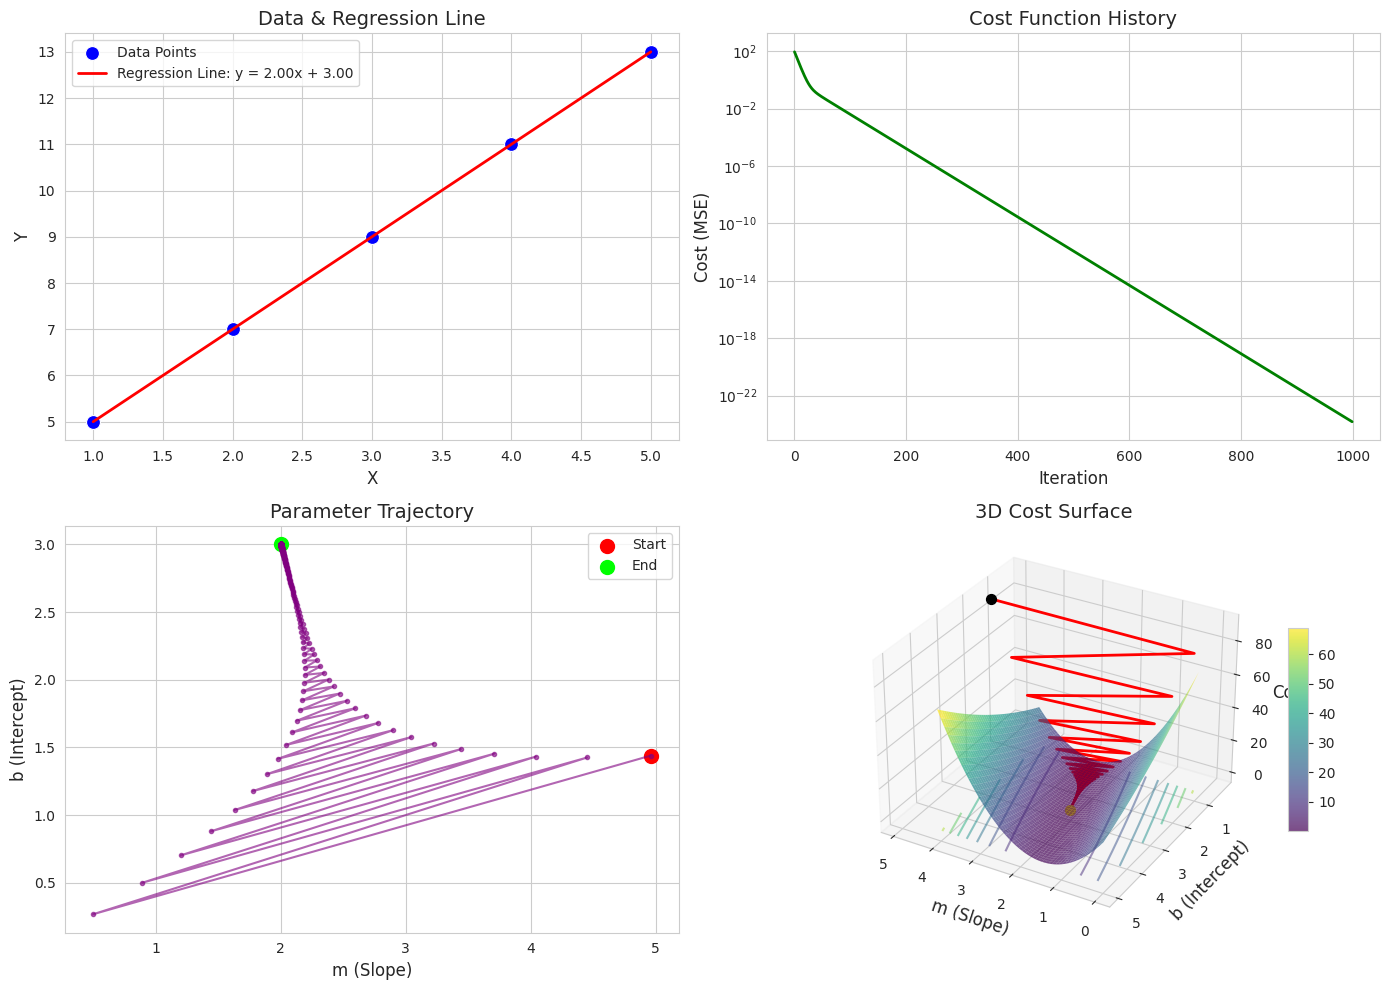

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def gradientDescent(x, y, iterations=1000, learning_rate=0.01):
    m, b = 0, 0
    n = len(x)
    cost_history, m_history, b_history = [], [], []

    for _ in range(iterations):
        y_pred = m * x + b
        cost = np.mean((y - y_pred) ** 2)
        m_grad = -(2 / n) * np.sum(x * (y - y_pred))
        b_grad = -(2 / n) * np.sum(y - y_pred)
        m -= learning_rate * m_grad
        b -= learning_rate * b_grad

        cost_history.append(cost)
        m_history.append(m)
        b_history.append(b)
        
    return m, b, cost_history, m_history, b_history

def plotResults(x, y, m_history, b_history, cost_history, m_final, b_final):
    sns.set_style("whitegrid")
    plt.figure(figsize=(14, 10))
    
    # Data & Regression Line 📊
    plt.subplot(2, 2, 1)
    sns.scatterplot(x=x, y=y, color='blue', s=100, label='Data Points')
    plt.plot(x, m_final * x + b_final, color='red', linewidth=2, 
             label=f'Regression Line: y = {m_final:.2f}x + {b_final:.2f}')
    plt.xlabel("X", fontsize=12)
    plt.ylabel("Y", fontsize=12)
    plt.title("Data & Regression Line", fontsize=14)
    plt.legend(fontsize=10)
    
    # Cost Function History 📉
    plt.subplot(2, 2, 2)
    plt.plot(cost_history, color='green', linewidth=2)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Cost (MSE)", fontsize=12)
    plt.title("Cost Function History", fontsize=14)
    plt.yscale("log")
    
    # Parameter Trajectory (m vs. b) 🚀
    plt.subplot(2, 2, 3)
    plt.plot(m_history, b_history, color='purple', marker='o', markersize=3, linestyle='-', alpha=0.6)
    plt.scatter(m_history[0], b_history[0], color='red', s=100, label='Start')
    plt.scatter(m_final, b_final, color='lime', s=100, label='End')
    plt.xlabel("m (Slope)", fontsize=12)
    plt.ylabel("b (Intercept)", fontsize=12)
    plt.title("Parameter Trajectory", fontsize=14)
    plt.legend(fontsize=10)
    
    # 3D Cost Surface 🌐
    ax = plt.subplot(2, 2, 4, projection='3d')
    m_vals = np.linspace(m_final - 2, m_final + 2, 50)
    b_vals = np.linspace(b_final - 2, b_final + 2, 50)
    M, B = np.meshgrid(m_vals, b_vals)
    Z = np.array([np.mean((y - (m * x + b)) ** 2) for m, b in zip(np.ravel(M), np.ravel(B))])
    Z = Z.reshape(M.shape)
    
    surf = ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.7, edgecolor='none')
    ax.contour(M, B, Z, zdir='z', offset=Z.min(), cmap='viridis', alpha=0.5)
    ax.plot(m_history, b_history, cost_history, color='red', linewidth=2)
    ax.scatter(m_history[0], b_history[0], cost_history[0], color='black', s=50)
    ax.scatter(m_final, b_final, cost_history[-1], color='yellow', s=50)
    ax.set_xlabel("m (Slope)", fontsize=12)
    ax.set_ylabel("b (Intercept)", fontsize=12)
    ax.set_zlabel("Cost", fontsize=12)
    ax.set_title("3D Cost Surface", fontsize=14)
    ax.view_init(elev=30, azim=120)
    plt.colorbar(surf, shrink=0.5, aspect=10)
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    x = np.array([1, 2, 3, 4, 5])
    y = np.array([5, 7, 9, 11, 13])
    m_final, b_final, cost_history, m_history, b_history = gradientDescent(x, y, iterations=1000, learning_rate=0.08)
    plotResults(x, y, m_history, b_history, cost_history, m_final, b_final)
